Use `pip install minisom` to install the package.

In [1]:
import minisom
from minisom import MiniSom
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.cluster import KMeans

## Homework4 Self-organizing map(SOM)

In this notebook we will use the data of 2500 molecules we already obtained by the end of the Mordred part of Week9 hands-on session. You can download the dataset `mordred_df.csv` from Canvas.

In [2]:
data = pd.read_csv("./mordred_df.csv",low_memory=False)

In [3]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,HOMO,LUMO,GAP,R2,ZPVE,U0,U,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,10000,10000,-0.2818,0.0280,0.3097,1109.2219,0.163679,-365.089448,-365.079822,...,8.124151,34.544698,113.084064,5.951793,67,8,30.0,31.0,4.722222,2.111111
1,1,10001,10001,-0.2338,0.0329,0.2667,1089.3310,0.175667,-345.190043,-345.180226,...,8.124151,34.544698,112.100048,5.605002,67,8,30.0,31.0,4.722222,2.111111
2,2,10002,10002,-0.2355,0.0301,0.2656,1055.7727,0.165093,-361.232458,-361.222832,...,8.124151,34.544698,113.095297,5.952384,67,8,30.0,31.0,4.722222,2.111111
3,3,10003,10003,-0.2497,0.0220,0.2716,1013.7067,0.152666,-381.108212,-381.099011,...,8.124151,34.544698,114.079313,6.337740,67,8,30.0,31.0,4.722222,2.111111
4,4,10004,10004,-0.2468,0.0315,0.2783,1158.4078,0.175927,-345.197890,-345.188039,...,8.124151,34.544698,112.100048,5.605002,67,8,30.0,31.0,4.722222,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,12495,12495,-0.2358,0.0769,0.3128,853.7899,0.154789,-384.924399,-384.917197,...,9.450066,58.686602,114.068080,6.337116,56,7,46.0,56.0,2.423611,1.666667
2496,2496,12496,12496,-0.2351,0.0884,0.3235,909.1024,0.178523,-349.001974,-348.994464,...,9.450066,58.686602,112.088815,5.604441,56,7,46.0,56.0,2.423611,1.666667
2497,2497,12497,12497,-0.2260,0.0838,0.3098,850.3884,0.154001,-384.917317,-384.909969,...,9.450066,58.686602,114.068080,6.337116,56,7,46.0,56.0,2.423611,1.666667
2498,2498,12498,12498,-0.2464,0.0896,0.3360,852.9093,0.154925,-384.926418,-384.919218,...,9.450066,58.686602,114.068080,6.337116,56,7,46.0,56.0,2.423611,1.666667


We picked 5 features from the dataset as the training data of SOM.

The meaning of these descriptors can be found here: http://mordred-descriptor.github.io/documentation/master/descriptors.html

In [4]:
subset = data[['nAtom', 'nBonds','bpol','apol','TopoPSA']]
traindata = subset.values

#normalize training data
traindata = (traindata - np.mean(traindata, axis=0)) / np.std(traindata, axis=0)

### To-do 1: Plot the feature correlation diagram for the dataframe `subset`. 
* Please refer to the feature correlation diagram in week5 hands-on jupyternotebook.

In [5]:
subset
cor = subset.corr()
cor

,nAtom,nBonds,bpol,apol,TopoPSA
nAtom,1.000000,0.976834,0.882186,0.965162,-0.636771
nBonds,0.976834,1.000000,0.847191,0.959526,-0.669947
bpol,0.882186,0.847191,1.000000,0.788566,-0.574630
apol,0.965162,0.959526,0.788566,1.000000,-0.762458
TopoPSA,-0.636771,-0.669947,-0.574630,-0.762458,1.000000


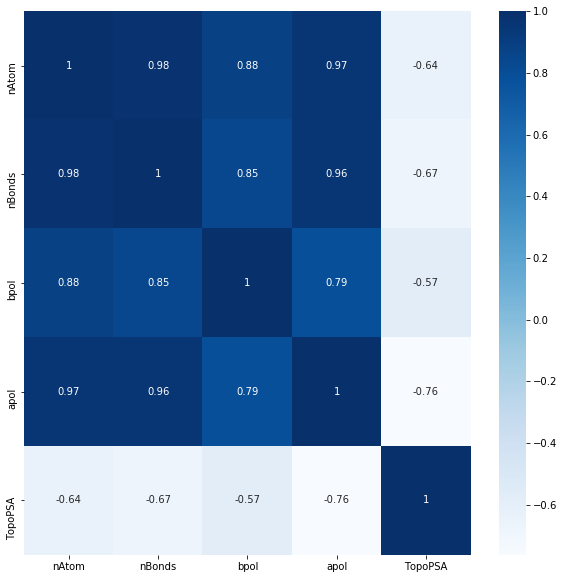

In [6]:
plt.figure(figsize=(10,10))
sn.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Train SOM with the traindata:

In [7]:
# Define a MiniSom object
size = 50
som = MiniSom(size, size, traindata.shape[1], sigma=1.0, learning_rate=1.0,neighborhood_function='gaussian', random_seed=0)

# Initialize the weights by PCA
som.pca_weights_init(traindata)

# trains the SOM with specified iterations
som.train(traindata, 5000) 

Get the errors:

In [8]:
print('Topographic error: ', som.topographic_error(traindata))
print('Quantization error: ', som.quantization_error(traindata))

Topographic error:  0.0148
Quantization error:  0.06300767649392978


### To-do 2: Visualize the SOM grid, show all the best matching units on it in red dots.

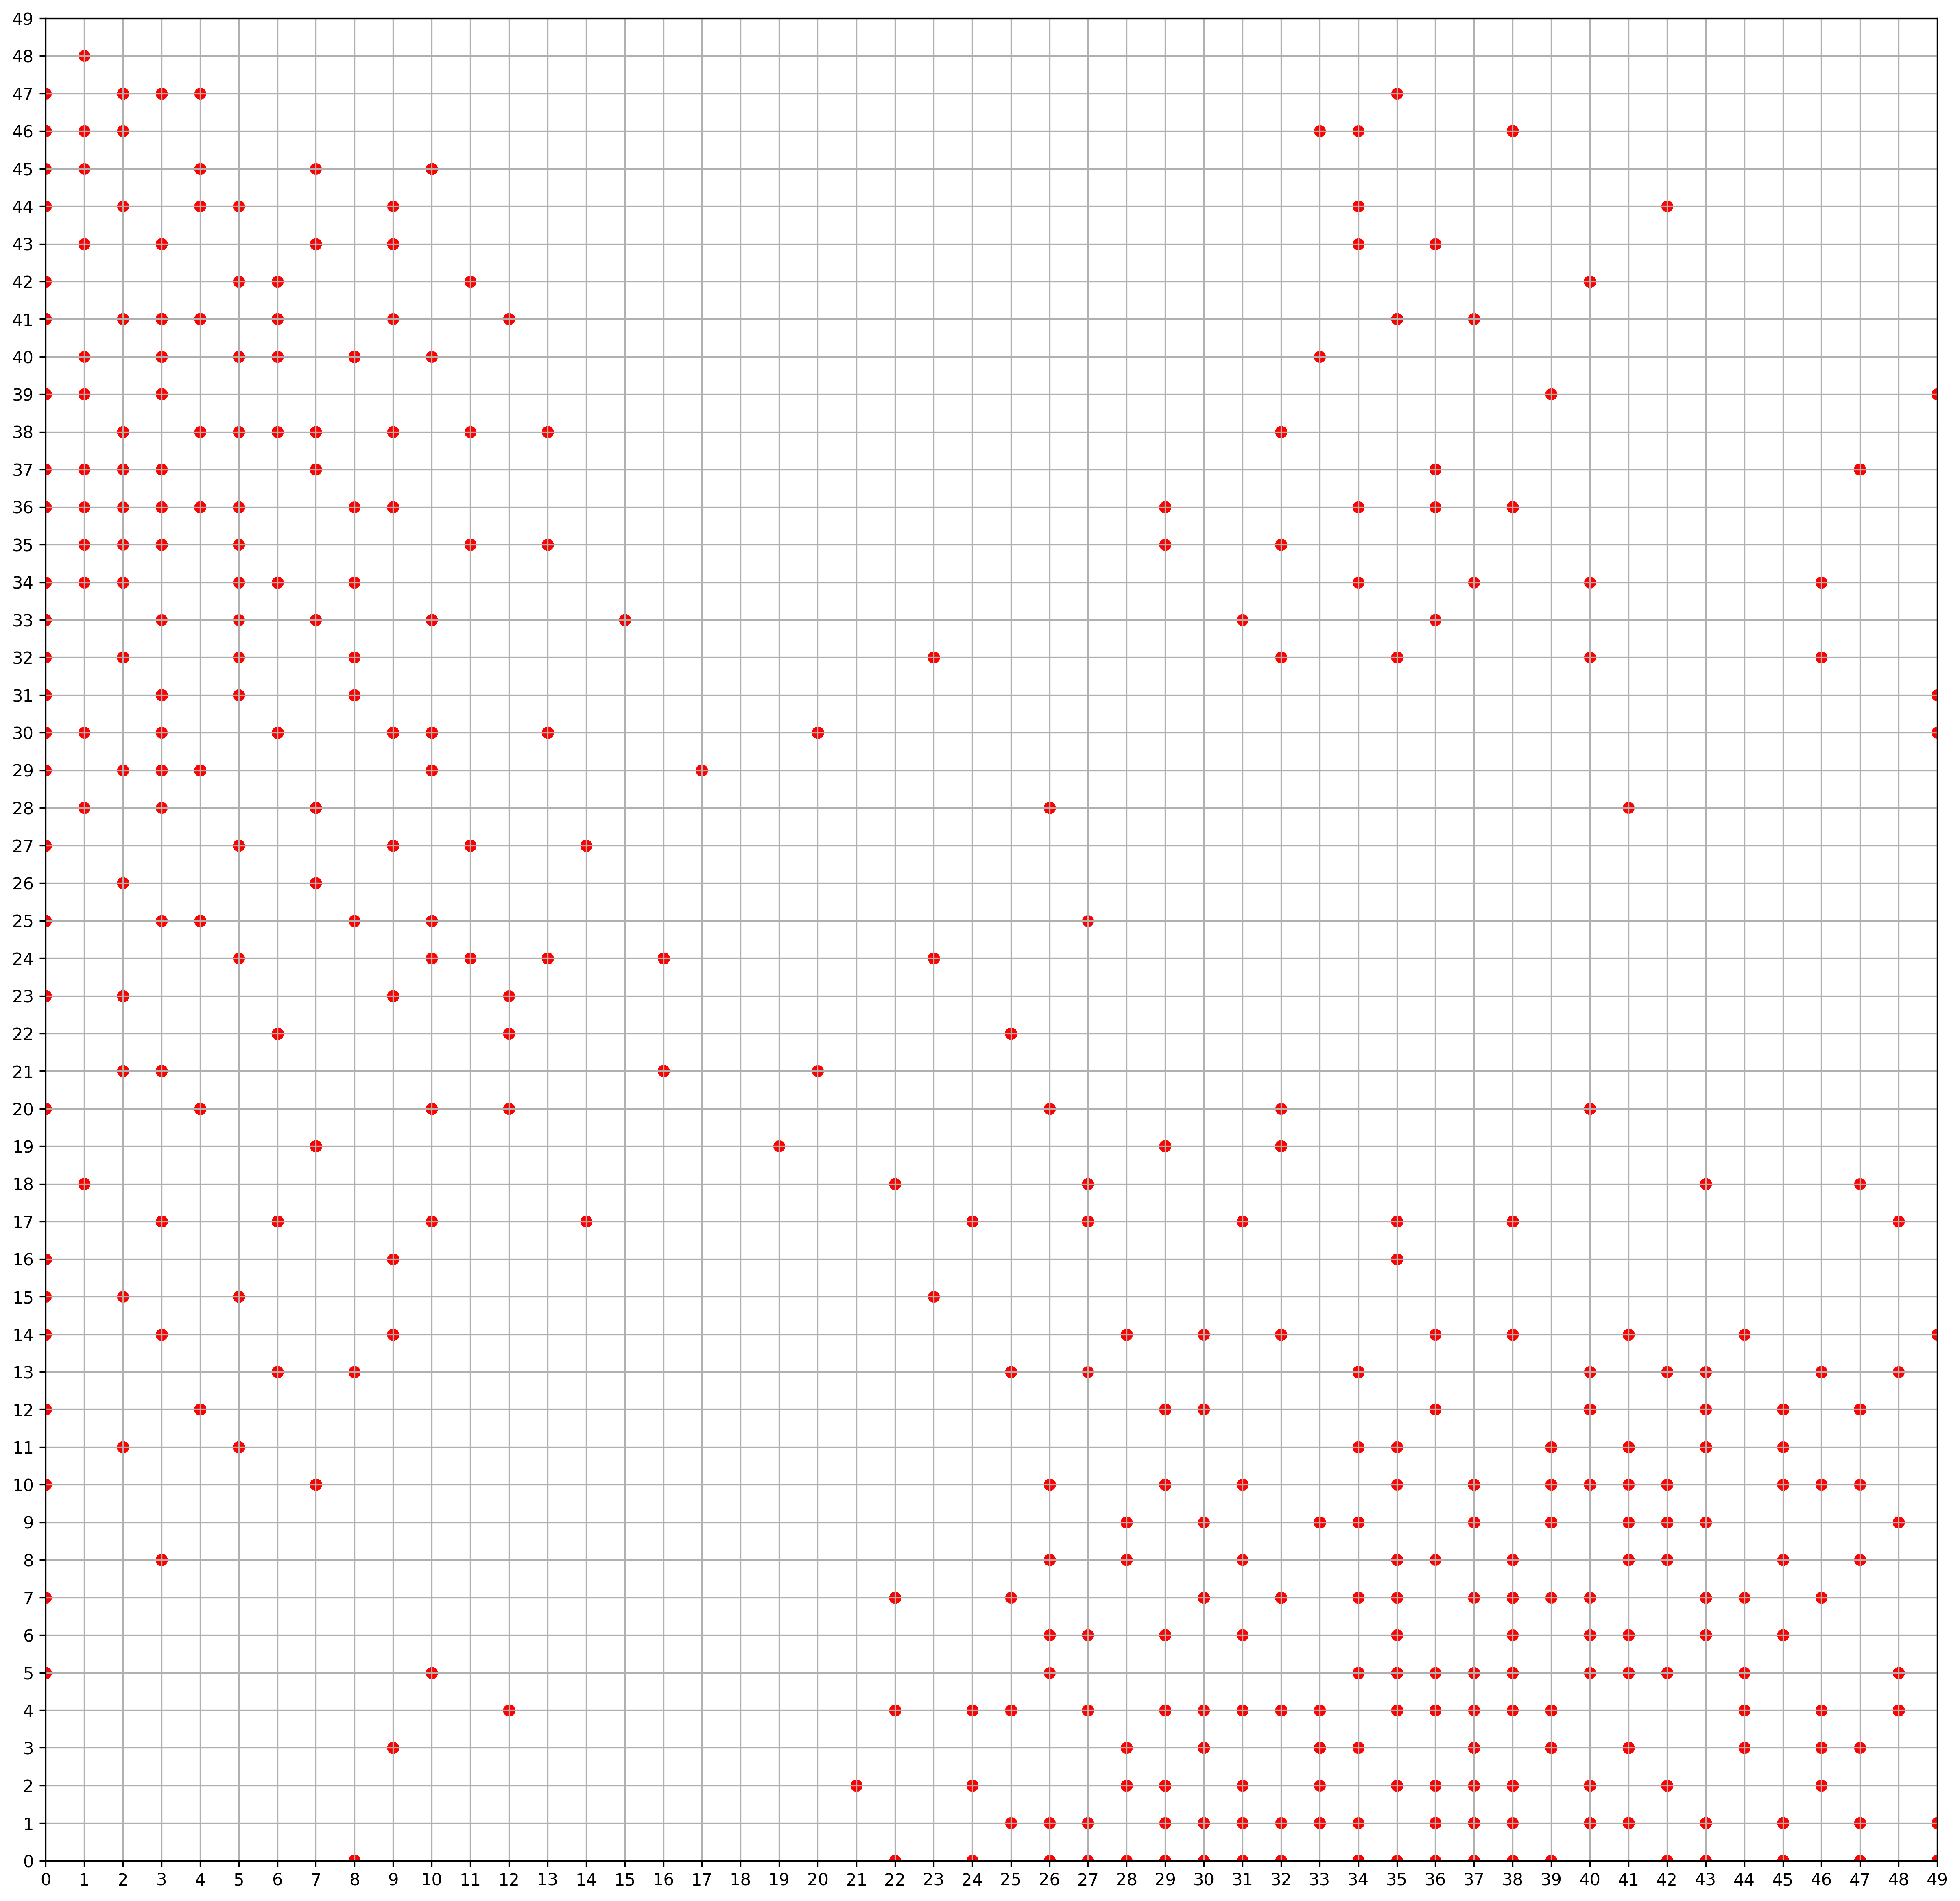

In [9]:
fig = plt.figure(figsize=(20,20),dpi=300)
ax = fig.add_subplot(111)

for index, datapoint in enumerate(traindata):
    w = som.winner(datapoint)
    x_coord = w[0]
    y_coord = w[1]
    plt.scatter(x_coord, y_coord, c='red')
    
plt.ylim(0,size-1)
plt.xlim(0,size-1)
ax.set_xticks(range(size))
ax.set_yticks(range(size))
plt.grid()

In [10]:
# get the weights of each node
W = som.get_weights()

Using the `get_weights` method of the som object, we can get the `weight` of each node in the SOM. (please refer to Prof.Luna Huang's lecture slides or the week9 hands-on notebook for the definition of `weight`, `node`)

What `get_weights` returns is an array in the shape (`length`,`width`,`N`), `length` and `width` are the length and width of the size of the grid, `N` is the number of features in the training dataset. You can think of this arrays as N matrices with shape of (`length`,`width`), each such matrix is corresponding to the distribution of one feature.

Then we can plot a heatmap for each of the features. In each heatmap we can show the distribution of the weight corresponding that feature.
For example in the below, the heatmap of `Number of Atoms` is given. The red region in this map indicates that the nodes in this region are corresponding to molecules with larger number of atoms, and blue region corresponds to molecules with smaller number of atoms. 

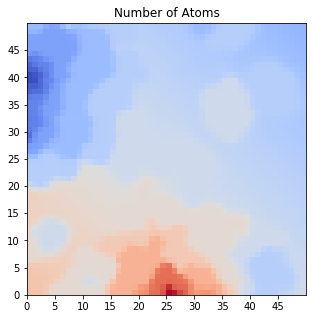

In [11]:
plt.figure(figsize=(5, 5))
plt.title('Number of Atoms')
plt.pcolor(W[:,:,0], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

### To-do 3: Plot the heatmaps for the rest 4 features.

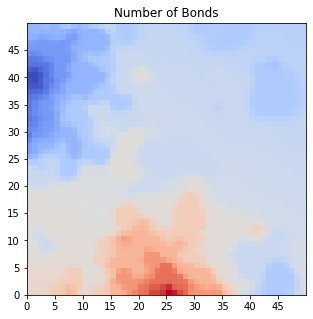

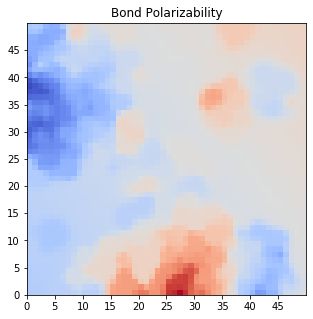

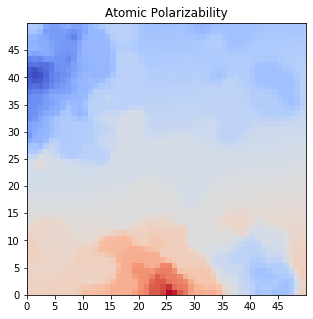

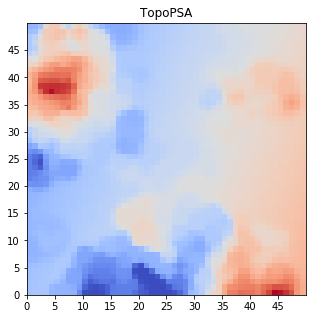

In [12]:
#N Bonds - 1 
#bpol - 2
#apol - 3
#TopoPSA - 4
for i in range(1,5):  
    plt.figure(figsize=(5,5))
    if i == 1:
        plt.title('Number of Bonds')
    if i == 2:
        plt.title('Bond Polarizability')
    if i == 3:
        plt.title('Atomic Polarizability')
    if i == 4:
        plt.title('TopoPSA')
    plt.pcolor(W[:,:,i],cmap='coolwarm')
    plt.xticks(np.arange(0,size,5))
    plt.yticks(np.arange(0,size,5))
    plt.show()



### Question: What can you observe from these heatmaps? Comparing with the feature correlation diagram you obtained in To-do 1, does it support what you observed from the heatmaps?

From these heat maps we are able to observe how the distribution of weights for each feature. We can see for example that the Number of Bonds heatmap and the Number of Atoms heat map look similar, because they are related to each other. The regions in red represent regions with larger number of bonds and larger number of atoms, and blue regions the opposite. This alligns with our correlation diagram because from that we were able to see that Number Atoms and Number Bonds have a 98% corellation. 

## K-means clustering

You may observe some patterns from the heatmaps. For example, some regions seems to have relatively low values for all the features(shown in blue in all the heatmaps), some regions have high values for certain features while one feature value is low, etc.

Let's try performing K-means clustering on the SOM and see if the clustering will refect the patterns we observed from heatmaps. It's essentially using the weights of all the nodes as the training data for KMeans. 

(If you have difficulty understanding this part, please refer to 'Using SOM in conjunction with other methods' part in the lecture slides)

In [19]:
# X is the training data of the KMeans. each row is the weight of one node.
# W is the weights we obtained above.
X = W.reshape(2500,5)

array([[ 0.94534168,  0.42253679, -0.50612385,  0.65497919, -0.49257705],
       [ 0.92601974,  0.41572624, -0.49395556,  0.65903188, -0.45968683],
       [ 0.90255324,  0.4108366 , -0.48110873,  0.66296423, -0.42947242],
       ...,
       [-0.90680774, -0.40886811,  0.48180718, -0.6630868 ,  0.42673515],
       [-0.92607492, -0.41570238,  0.49396555, -0.659033  ,  0.45965601],
       [-0.94534208, -0.42253664,  0.50612393, -0.6549792 ,  0.49257686]])

In [20]:
# Fit Kmeans model with 4 clusters
kmeans = KMeans(n_clusters=4,random_state=55).fit(X)

KMeans(n_clusters=4, random_state=55)

### To-do 4: get the cluster index of each node. (Cluster index are numbers such as 0,1,2,or 3 indicating which cluster each sample belongs to)

* You can refer to: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [23]:
kmeans.fit_predict(X)

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

### (Extra credit) To-do 5: visualize the SOM grid, show each little squares in colors corresponding to the clusters of the nodes.

* This is to ask you make a clustering plot like the one on the right (No need to show the best matching unit and text)

<img width="256" alt="TrainSOM" src="https://ars.els-cdn.com/content/image/1-s2.0-S2590048X19300202-gr7.jpg"></a>


hint: You can use the function `plt.pcolor`